In [1]:
"""
차원과 차원 축소

차원 

비지도 학습 작업 중 하나인 차원 축소 알고리즘
대표적인 차원 축소 알고리즘인 주성분 분석 - PCA 라고 부른다

분산은 데이터가 널리 퍼져있는 정도를 말함
분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터 
이런 벡터를 주성분 이라고 부른다
주성분 벡터는 원본 데이터에 있는 어떤 방향
따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다
하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있습니다

주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다는 점을 기억
주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 
가지고 있는 특성을 가장 잘 나타내고 있을 것이다

첫 번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾습니다
이 벡터가 두 번쨰 주성분 입니다. 


-PCA 클래스
"""
import numpy as np 
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
"""
사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공함
PAC 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야함
k-평균과 마찬가지로 비지도 학습이기 때문에 fit()메소드에 타깃값을 제공하지 않는다
"""
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
"""
PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다
이 배열의 크기를 먼저 확인
"""
print(pca.components_.shape)

(50, 10000)


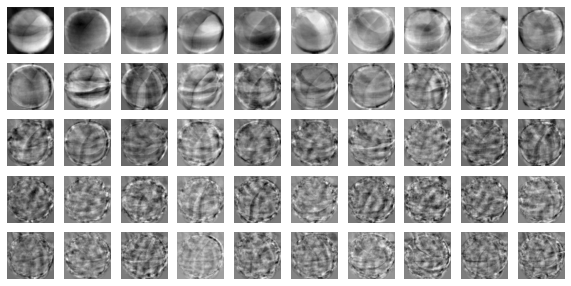

In [4]:
"""
n_components=50으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원이 50임
즉 50개의 주성분을 찾았다
두 번쨰 차원은 항상 원본 데이터의 특성 개수와 같은 10000임

원본 데이터와 차원이 같으므로 주성분을 100X100 크기의 이미지처럼 출력해 볼 수 있다
2절에서 사용했던 draw_fruits()함수를 사용함

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것
한편으로 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다
"""
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)  # n은 샘플 개수
    # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수임. 그렇지 않으면 10개 임
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n : # n 개 까지만 그림
                axs[i, j].imshow(arr[i*10 + j], cmap="gray_r")
            axs[i, j].axis("off")
    plt.show()
    
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [5]:
"""
주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일수 있다
마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있습니다
PCA의 transform()메서드를 사용해 원본 데이터의 차원을 50으로 줄여봄
"""
print(fruits_2d.shape)

(300, 10000)


In [6]:
"""
fruits_2d 는( 300, 10000) 크기의 배열이었다
10000개의 픽셀(특성)을 가진 300개의 이미지 입니다
50개의 주성분을 찾은 PCA모델을 사용해 이를 (300, 50) 크기의 배열로 변환함
이제 fruits_pca 배열은 50개의 특성을 가진 데이터
"""
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [7]:
"""
-원본 데이터 재구성
앞에서 10000개의 특성을 50개로 줄였습니다
이로 인해 어느정도 손실이 발생할 수 밖에 없습니다
하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다

PCA클래스는 이를 위해 inverse_transform()메서드를 제공함
앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10000개의 특성을 복원
"""
fruits_inverse =pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


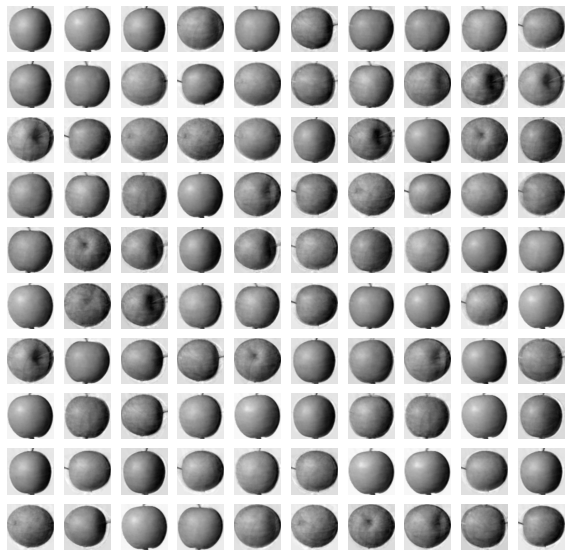

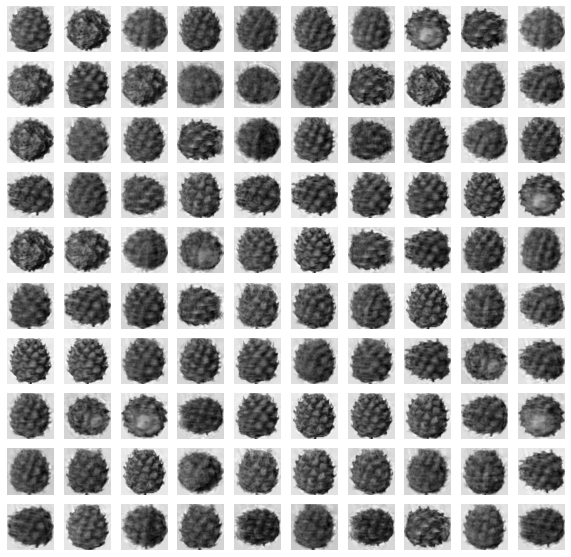

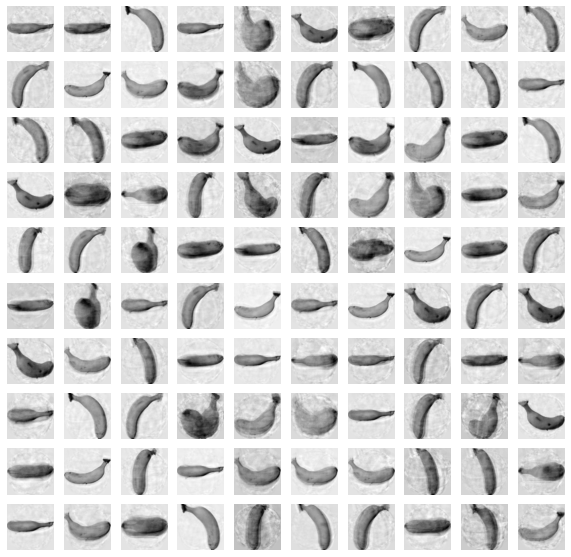

In [8]:
"""
10000개의 특성이 복원됨
이 데이터를 100개씩 나누어 출력

일부 흐리고 번진 부분이 있지만 50개의 특성을 10000개로 복원이 잘됨

만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을것
그럼 50개의 특성은 얼마나 분산을 보존하고 있는것일까?
"""
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [9]:
"""
- 설명된 분산
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산 이라고함
PCA 클래스의 explained_variance_ratio_ 에 각 주성분의 설명된 분산 비율이 기록되어있다
당연히 첫 번째 주성분의 설명된 분산이 가장 큼
이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다
"""
print(np.sum(pca.explained_variance_ratio_))

0.9214900554448452


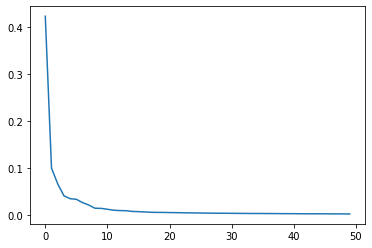

In [10]:
"""
92%가 넘는 분산을 유지하고 있다
설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는데 도움이 됨

그래프를 보면 처음 10개의 주성분이 대두분의 분산을 표현하고 있다
PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련해봄
"""
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [11]:
"""
- 다른 알고리즘과 함께 사용하기
과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 
어떤 차이가 있는지 알아 봄
3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용함
먼저 사이킷런의 LogisticRegression 모델 생성
"""
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [12]:
"""
지도 학습 모델을 사용하려면 타깃값이 필요
여기에서는 사과를 0, 파인애플을 1, 바나나를 2로 지정
파이썬 리스트로 생성
"""
target = np.array([0]*100 + [1]*100 + [2]*100)

In [13]:
"""
원본 데이터인 fruits_2d를 사용해봄
로지스틱 회귀 모델에서 성능을 가늠해 보기 위해 cross_validate()로 교차 검증 수행
fit_time 책보다 짧은건 맞다
"""
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.22173142433166504


In [15]:
"""
교차 검증의 점수는 0.997정도로 매우 높다 
특성이 10000개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉽습니다
cross_validate()함수가 반환하는 딕셔너리에는 
fit_time 항모게 각 교차 검증 폴드의 훈련 시간이 기록되어 있다
이 값을 PCA로 축소한 fruits_pca를 사용했을 때와 비교
"""
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

1.0
0.013799285888671875


In [16]:
"""
50개의 특성만 사용했는데 정확도가 100%이고 
훈련시간은 매우 짧아짐

--
PCA클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했습니다
이 대신 원하는 설명된 분산의 비율을 입력할 수도 있다
PCA클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾습니다
설명된 분산의 50%에 달하는 주성분을 찾도록 PCA모델을 만들어 봄
"""
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [17]:
"""
몇개의 주성분을 찾았는지 확인
"""
print(pca.n_components_)

2


In [33]:
pca_100 = PCA(n_components=0.99)
pca_100.fit(fruits_2d)

PCA(n_components=0.99)

In [34]:
print(pca_100.n_components_)

162


In [39]:
pca_1 = PCA(n_components=1)
pca_1.fit(fruits_2d)

PCA(n_components=1)

In [40]:
print(pca_1.n_components_)

1


In [41]:
"""
단 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다
이 모델로 원본 데이터를 변환함
주성분이 2개이므로 변환된 데이터의 크기는 (300,2)가 됨
"""
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [42]:
"""
2개의 특성만 사용함

놀랍게도 99%에 달하는 정확도
"""
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.99
0.021509361267089844


c:\programdata\anaconda3\envs\tensor1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\programdata\anaconda3\envs\tensor1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [43]:
"""
이번에는 차원 축소된 데이터를 사용해 
k-평균 알고리즘으로 클러스터를 찾아봄
"""
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


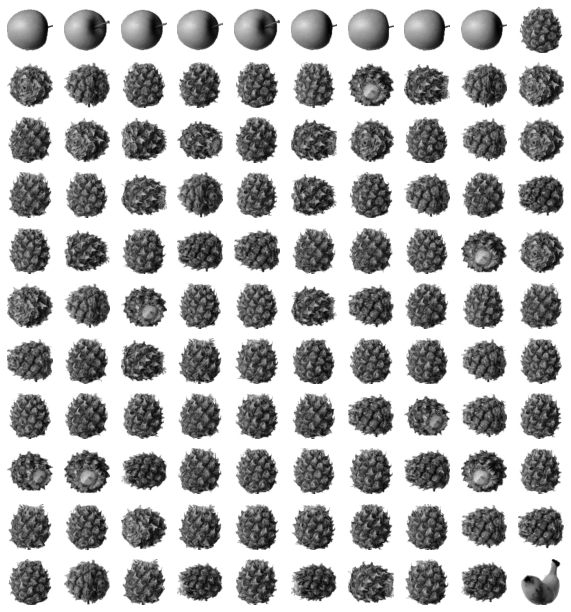

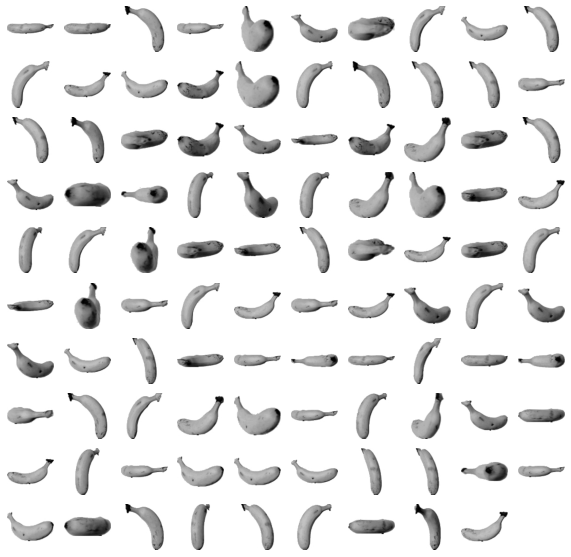

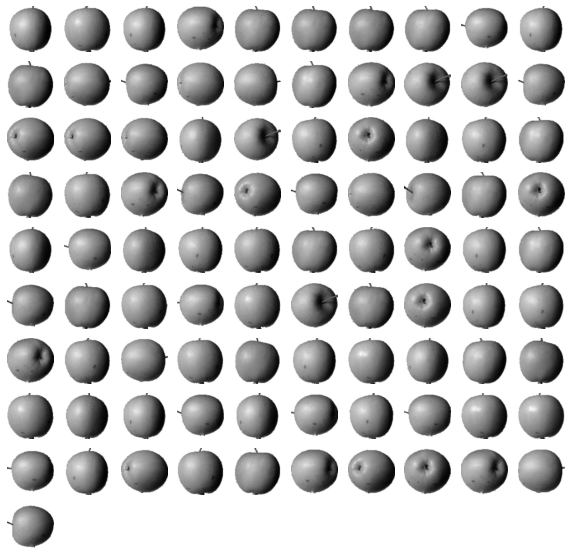

In [44]:
"""
fruits_pca로 찾은 클러스터는 각 110개,99개,91개의 샘플을 포함함
KMeans가 찾은 레이블을 사용해 과일 이미지를 출력
"""
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

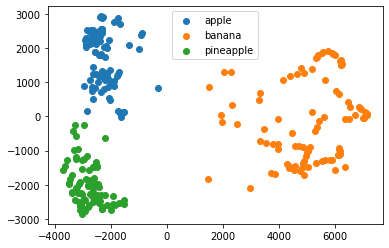

In [45]:
"""
2절에서 찾은 클러스터와 비슷하게 파인애플은 사과와 조금 혼돈하는 모습

훈련 데이터의 차원을 줄이면 얻을수 있는 장점은 시각화
3개 이하로 차원을 줄이면 화면에 출력하기 비교젹 쉽다
fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현 가능
km.labels_를 사용해 클러스터별로 나누어 산점도를 그려봄

2개의 특성만 사용했는데 로지스틱 회귀 모델의 교차 검증 점수가 99%에 달하는 모습
"""
for label in range(0,3):
    data = fruits_pca[km.labels_ ==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(["apple", "banana","pineapple"])
plt.show()